In [2]:
def my_rand(x, n):
    a = 22695477
    b = 1
    m = 2 ** 32
    
    sequence = []
    
    for i in range(n):
        x = (a * x + b) % m
        sequence.append(x / m)
    
    return sequence

In [33]:
import math

x = 1
sequences = []

for n in [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]:
    sequence = my_rand(x, n)
    sequence = [i*10 for i in sequence]
    sequences.append(sequence)
    print(sequence[:10])

[0.05284202750772238, 5.019934882875532, 6.675799330696464, 0.16643698560073972, 6.77865092176944, 6.086047131102532, 2.6848535053431988, 0.9788859472610056, 3.5016853688284755, 9.749483184423298]
[0.05284202750772238, 5.019934882875532, 6.675799330696464, 0.16643698560073972, 6.77865092176944, 6.086047131102532, 2.6848535053431988, 0.9788859472610056, 3.5016853688284755, 9.749483184423298]
[0.05284202750772238, 5.019934882875532, 6.675799330696464, 0.16643698560073972, 6.77865092176944, 6.086047131102532, 2.6848535053431988, 0.9788859472610056, 3.5016853688284755, 9.749483184423298]
[0.05284202750772238, 5.019934882875532, 6.675799330696464, 0.16643698560073972, 6.77865092176944, 6.086047131102532, 2.6848535053431988, 0.9788859472610056, 3.5016853688284755, 9.749483184423298]


In [32]:
def math_exp(seq):
    return sum(seq)/len(seq)

def variance(seq):
    n = len(seq)
    M = math_exp(seq)
    var = sum((x - M) ** 2 for x in seq) / n 
    return var

In [4]:
print(math_exp(sequences[0]))
print(variance(sequences[0]))

4.844686777098104
8.10417802302623


Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 4.844686777098104, 8.10417802302623
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 5.082843668749556, 8.119521310849297
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 4.997016315227374, 8.307222867184425
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 4.992300205504522, 8.344250450440779


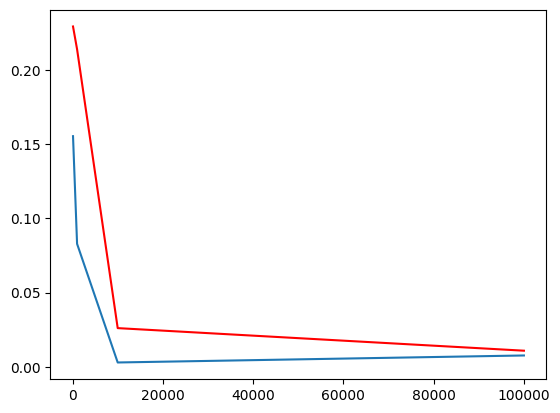

In [41]:
M = 5
D = 100/12
m_errors = []
d_errors = []
for seq in sequences:
    print(f'Равномерн. M, D: {M}, {D} -- Послед.: {math_exp(seq)}, {variance(seq)}')
    m_error = abs(M - math_exp(seq))
    d_error = abs(D - variance(seq))
    
    m_errors.append(m_error)
    d_errors.append(d_error)

plt.plot([10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5], m_errors)
plt.plot([10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5], d_errors, 'r')

In [38]:
for seq in sequences:
    period = 0
    for i in range(len(seq)):
        target = round(seq[i], 5)
        for j in range(i, len(seq)):
            if i != j and round(seq[j], 5) == target:
                period = j - i
    print(period)
    

0
0


KeyboardInterrupt: 

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def frequencies(data, left_bound, right_bound, num_bins):
    bins = np.linspace(left_bound, right_bound, num_bins + 1)
    
    counts, _ = np.histogram(data, bins=bins, density=True)
        
    total_count = len(data)
    freqs = counts / total_count

    plt.figure()
    plt.bar(bins[:-1], freqs)
    
    return freqs

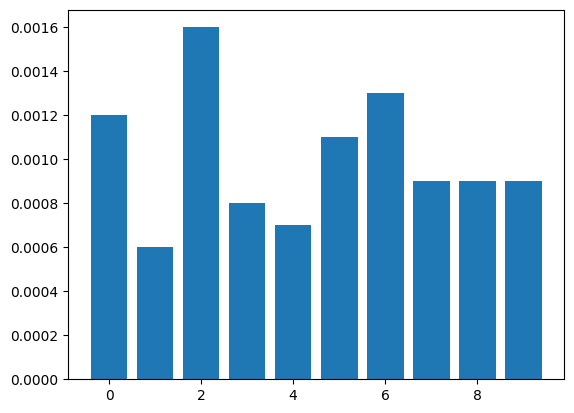

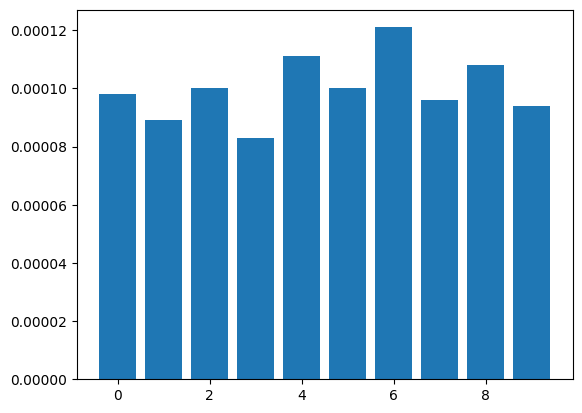

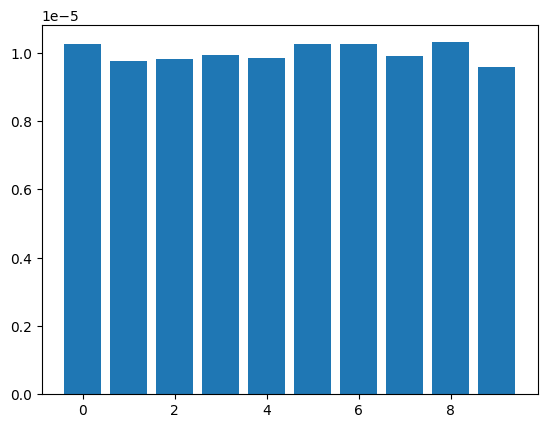

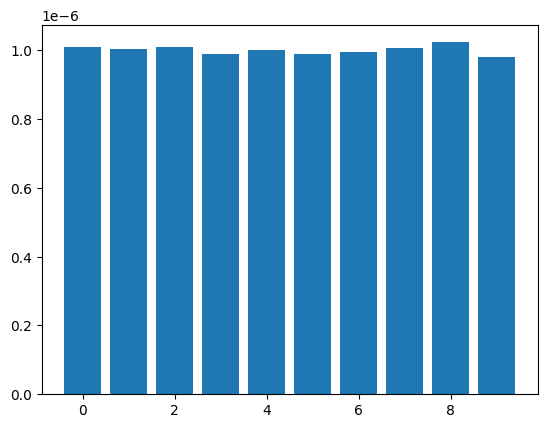

In [43]:
freqs = []
num_bins = 10
bins = np.linspace(0, 10, num_bins + 1)

for seq in sequences:
    freqs.append(frequencies(seq, 0, 10, num_bins))

In [71]:
from scipy.stats import chisquare

expected_freqs = []

total_observations = sum(len(seq) for seq in sequences)
expected_freqs = [0.1] * 10
observed_freqs = freqs

In [72]:
for i in range(len(freqs)):
    chi2_statistic = sum((observed_freqs[i] - expected_freqs[i]) ** 2 / expected_freqs[i] )
    print(chi2_statistic)

0.9801082000000001
0.99800101092
0.999800010005878
0.9999800001000152


In [34]:
import math
import random
import numpy as np

x = 1
sequences = []

for n in [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]:
    sequence = np.random.rand(n)
    sequence = [i*10 for i in sequence]
    sequences.append(sequence)
    print(sequence[:10])

[np.float64(4.076470966260127), np.float64(4.843601425538365), np.float64(3.603477231844403), np.float64(9.305527408048768), np.float64(4.63634978460226), np.float64(3.6392028797973106), np.float64(8.879888770029327), np.float64(1.7754863150208788), np.float64(0.04780907382276767), np.float64(7.186621598535917)]
[np.float64(0.6060607624992154), np.float64(9.978495731642234), np.float64(4.989165837754238), np.float64(6.704648060910162), np.float64(0.7659068453156892), np.float64(2.470711050353226), np.float64(5.398465652783248), np.float64(5.689970859274958), np.float64(7.038521642423305), np.float64(1.2880524789383407)]
[np.float64(1.8716546400732237), np.float64(9.842679465502787), np.float64(4.096542250733423), np.float64(8.567674323524427), np.float64(2.6292896274102917), np.float64(4.496055250885141), np.float64(9.495600943662232), np.float64(5.434740582805188), np.float64(9.827362704684376), np.float64(4.092607446270097)]
[np.float64(6.880464393553019), np.float64(8.97876403825751

Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 4.974937705436148, 7.515192754331564
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 5.088299429170523, 8.40195114438752
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 5.006130186186451, 8.436088473601917
Равномерн. M, D: 5, 8.333333333333334 -- Послед.: 5.0015359081972335, 8.318152321829466


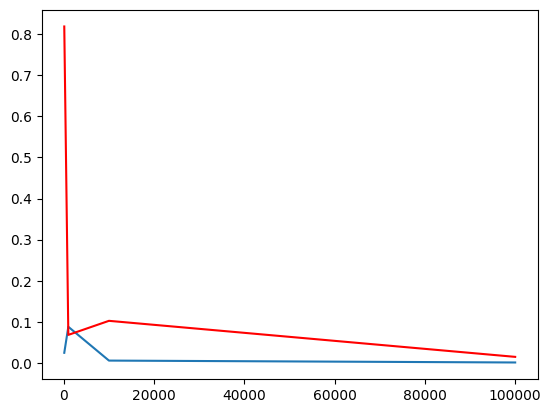

In [35]:
M = 5
D = 100/12
m_errors = []
d_errors = []
for seq in sequences:
    print(f'Равномерн. M, D: {M}, {D} -- Послед.: {math_exp(seq)}, {variance(seq)}')
    m_error = abs(M - math_exp(seq))
    d_error = abs(D - variance(seq))
    
    m_errors.append(m_error)
    d_errors.append(d_error)

plt.plot([10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5], m_errors)
plt.plot([10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5], d_errors, 'r')

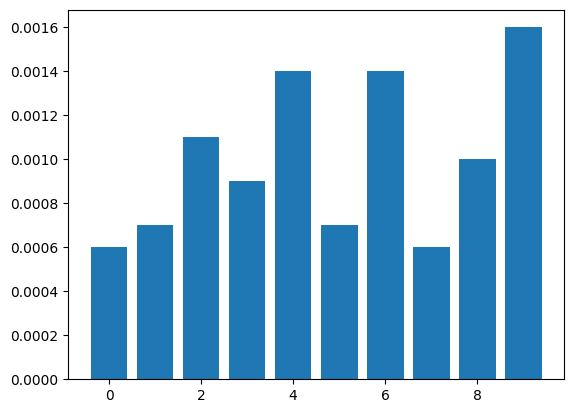

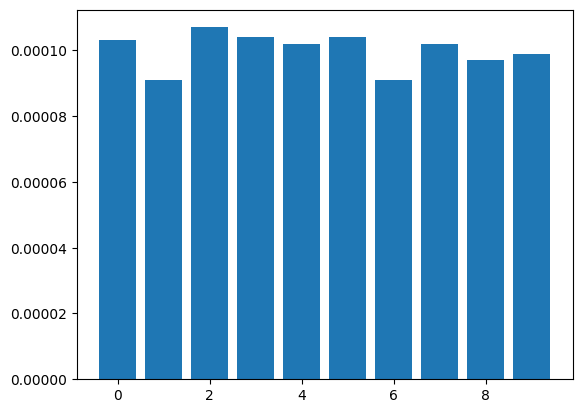

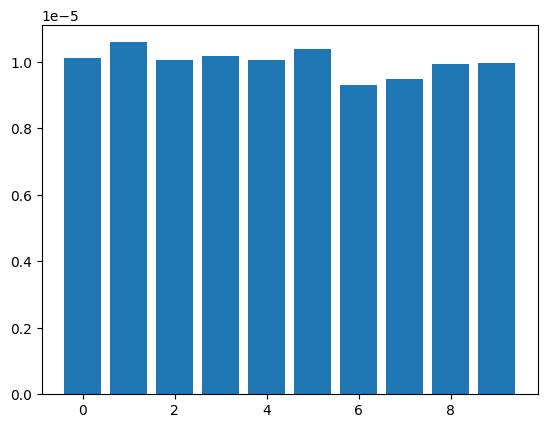

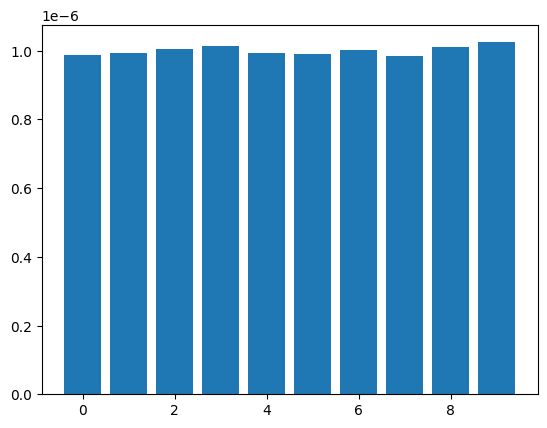

In [25]:
freqs = []
num_bins = 10
bins = np.linspace(0, 10, num_bins + 1)

for seq in sequences:
    freqs.append(frequencies(seq, 0, 10, num_bins))

In [36]:
from scipy.stats import chisquare

expected_freqs = []

total_observations = sum(len(seq) for seq in sequences)
expected_freqs = [0.1] * 10
observed_freqs = freqs

In [37]:
for i in range(len(freqs)):
    chi2_statistic = sum((observed_freqs[i] - expected_freqs[i]) ** 2 / expected_freqs[i] )
    print(chi2_statistic)

0.980112
0.9980010027000001
0.9998000100131301
0.9999800001000161
